# The Data
* We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [2]:
#Import os, pandas and numpy
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
os.chdir("C:\\Users\\MANDY\\Desktop\\dataset")

In [4]:
college=pd.read_csv("college_dataset_clustering.csv")

In [5]:
college.dtypes

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [12]:
# column drop 
college.drop(college.iloc[:, 0:1], inplace=True, axis=1)

# EDA

### Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.

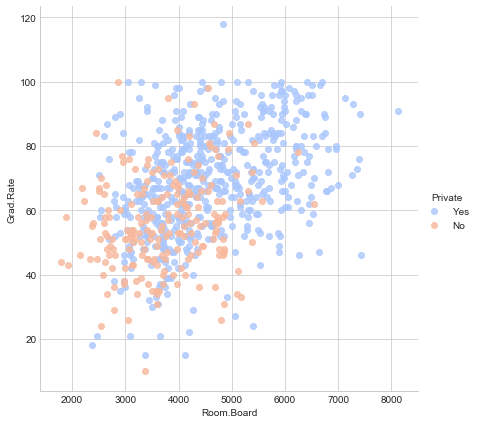

In [7]:
# data visualization
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=college, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

#### Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.

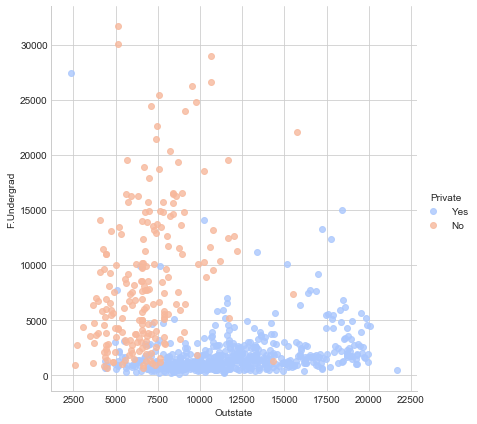

In [8]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=college, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

#### Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using sns.FacetGrid. If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist'). 

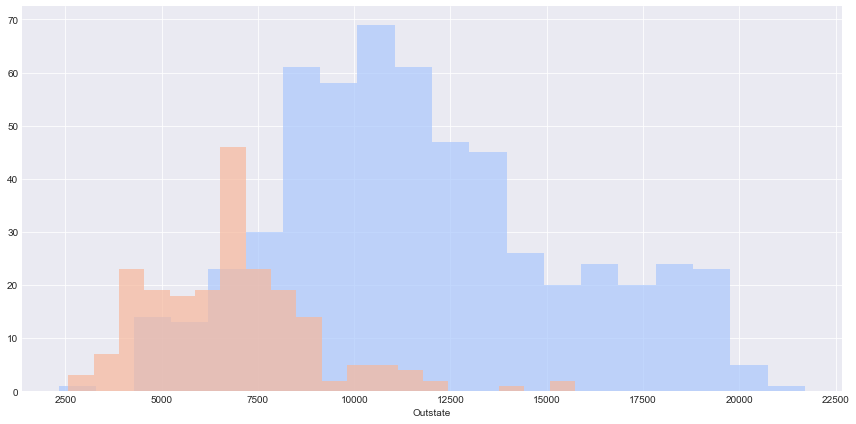

In [9]:
sns.set_style('darkgrid')
g = sns.FacetGrid(college,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

#### Create a similar histogram for the Grad.Rate column.

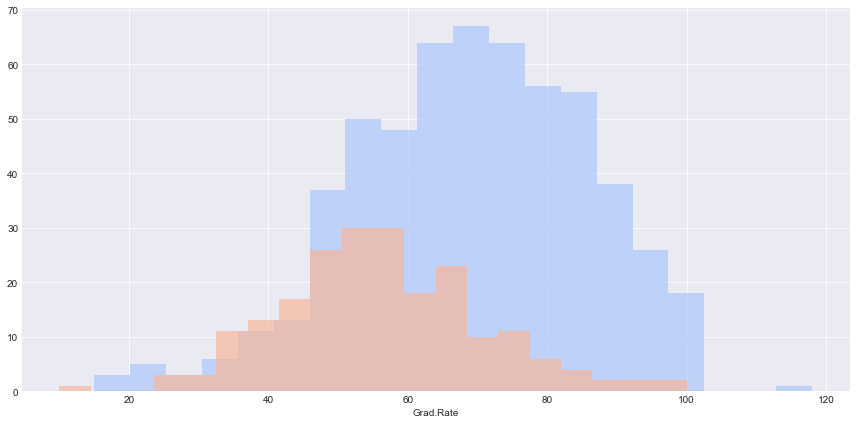

In [10]:
sns.set_style('darkgrid')
g = sns.FacetGrid(college,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

* Cluster analysis is an exploratory analysis that tries to identify structures within the data.  Cluster analysis is also called segmentation analysis or taxonomy analysis.  More specifically, it tries to identify homogenous groups of cases if the grouping is not previously known.  Because it is exploratory, it does not make any distinction between dependent and independent variables.  The different cluster analysis methods that SPSS offers can handle binary, nominal, ordinal, and scale (interval or ratio) data.

In [13]:
college_scaled = college.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [14]:
college_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [15]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
Z = linkage(college_scaled, 'complete')

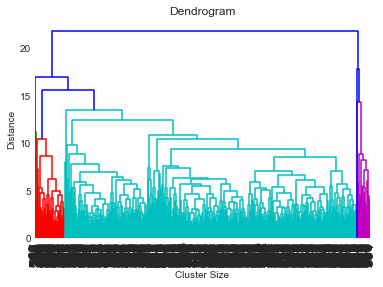

In [17]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=15.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

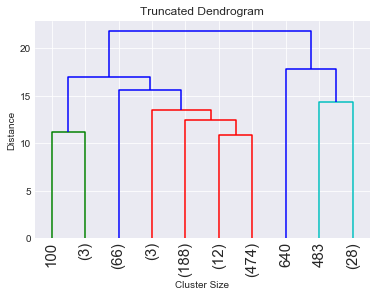

In [18]:
dendrogram(Z,truncate_mode='lastp',p=10,leaf_rotation=90, leaf_font_size=15.)
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

* The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance. If we look back at above graph, we can see that points 12 and 474 are closest to each other while points 7 and 8 are closes to each other. Therefore a cluster will be formed between these two points first. In above graph, you can see that the dendograms have been created joining points 12 with 474, and 100 with 3. The vertical height of the dendogram shows the Euclidean distances between points. From above graph, it can be seen that Euclidean distance between points 100 and 3 is greater than the distance between point 8 and 7.
* The next step is to join the cluster formed by joining two points to the next nearest cluster or point which in turn results in another cluster. If you look at above Graph1, point 188 is closest to cluster of point 12 and 474, therefore in Graph2 dendrogram is generated by joining point 640 with dendrogram of point 12 and 474. This process continues until all the points are joined together to form one big cluster.
 *Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it

## Agglomerative Hierarchical Clustering

In [19]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [20]:
hclust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

* The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram

In [21]:
hclust.fit(college_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x00000271C3901840>)

## grouping the data

In [22]:
college['Groups'] = hclust.labels_

In [23]:
college.head(10)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Groups
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0
5,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,0
6,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,0
7,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,0
8,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,0
9,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52,0


In [24]:
college.groupby(['Groups']).mean()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Groups,,,,,,,,,,,,,,,,,
0,2491.981258,1680.623829,651.358768,26.958501,54.982597,3025.567604,741.923695,10501.447122,4355.448461,547.261044,1326.258367,72.074967,79.210174,13.998929,22.945114,9615.919679,65.435074
1,15852.034483,10578.896552,3998.275862,43.068966,76.793103,20628.517241,3052.206897,8926.551724,4432.206897,598.310345,1657.034483,87.206897,92.034483,16.493103,17.068966,10577.206897,66.896552
2,11054.000000,6397.000000,3524.000000,26.000000,55.000000,16502.000000,21836.000000,8949.000000,3744.000000,714.000000,2910.000000,88.000000,90.000000,12.200000,37.000000,16122.000000,45.000000


* INSIGHTS
* CLUSTER 0 :-LESS NO OF APPLICATIONS AND HIGH OUTSTATE(i.e:no of student goes outside for study).
* CLUSTER 1 :-MOST STUDENT ENROLLED IN GROUP1 , NO OF PARTTIME UNDERGRADUATE IS LESS AND FULL TIME UNDERGRADUATE IS MORE.
* CLUSTER 2 :- NO OF PARTTIME UNDERGRADUATE AND FULLTIME UNDERGRADUTE IS MORE THAN , WHERE AS ACCEPTANCE AND ENROLLMENT IS LESS

# k means

In [25]:
college.sample(5)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Groups
531,818,700,447,20,50,2962,651,3738,2619,450,1022,55,59,19.6,9,4444,53,0
554,861,609,215,10,27,1117,815,8650,5700,500,1750,69,73,16.1,13,6534,67,0
382,3500,2836,1779,15,42,8730,993,5552,3710,550,2300,75,83,17.6,8,6324,37,0
586,592,501,279,19,44,1204,392,6400,3484,600,1800,80,83,14.5,10,7936,43,0
658,5530,4007,1697,12,37,8463,1498,7731,4128,540,2286,75,75,21.5,8,6309,40,0


In [26]:
# stadrizatization
college_scaled = college.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [27]:
college_scaled.sample(5)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Groups
707,-0.239583,-0.119126,-0.279969,1.216259,1.273409,-0.247335,-0.432021,0.338106,-1.001401,-0.299280,-0.799015,0.878789,0.631915,0.027882,0.020681,0.003991,1.720585,-0.197328
715,-0.396006,-0.456741,-0.530890,-0.428757,-0.343404,-0.530173,-0.288079,0.114249,0.677445,-0.299280,-1.168490,-0.163028,0.088174,0.407072,-0.706073,-0.355697,0.147768,-0.197328
481,-0.663865,-0.693113,-0.688120,0.025041,-0.141302,-0.634561,-0.385355,0.126686,0.221237,0.003752,-0.577330,0.388522,0.156142,-0.300749,0.585935,-0.075918,0.905050,-0.197328
364,-0.325681,-0.259969,-0.186277,0.138490,0.414477,-0.297466,-0.527324,-0.034989,0.659197,-0.450796,-0.207855,-0.285595,-0.319632,0.002603,0.585935,-0.363745,1.371070,-0.197328
326,0.277777,0.456493,-0.045201,-0.145133,-0.090777,-0.142328,-0.441222,0.634095,1.772345,0.306784,-0.651225,0.817506,0.563948,0.154279,0.343683,-0.040658,0.846798,-0.197328


In [28]:
from sklearn.cluster import KMeans

In [29]:
km = KMeans(n_clusters=3,n_init=40)

In [30]:
#Fit the kmeans model
km.fit(college_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=40, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
#Cluster labels
km.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2,
       0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0,
       0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1,
       0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

* We can see the values of 0,1,2,3s and 4s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster and 2 represent the 3rd cluster 3 represet the 4th cluster 4th represent 5th cluster. Let’s now visualize the four clusters:

In [32]:
#Within Group SSE
km.inertia_

8794.241074765032

In [33]:
#Calculating the within group SSE for different cluster solutions
inertias = []
for k in [1,2,3,4,5,6]:
    km = KMeans(n_clusters=k,n_init=40)
    inertia = km.fit(college_scaled).inertia_
    inertias.append(inertia)

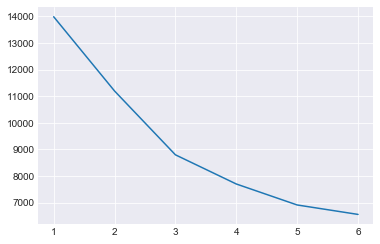

In [34]:
#Plotting the scree plot
plt.plot([1,2,3,4,5,6], inertias)
plt.show()

 * conclusion:-Goal of cluster analysis is to minimize the distance of each cluster

* WE CAN SEE NO. OF CLUSTERS 3 THE RATE OF DECREASE IN  SSE IS NOT SIGNIFICANT